C:\Users\janan\AppData\Local\Temp\ipykernel_23324\3059050419.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_location = pd.read_sql(query, conn)


Revenue and Transaction Count by Location:
      Location  Transaction_Count     Revenue
0  Los Angeles               1046  1568597.72
1      Chicago                987  1554205.80
2      Houston                982  1536916.04
3        Miami               1004  1531684.14
4     New York                981  1491279.86


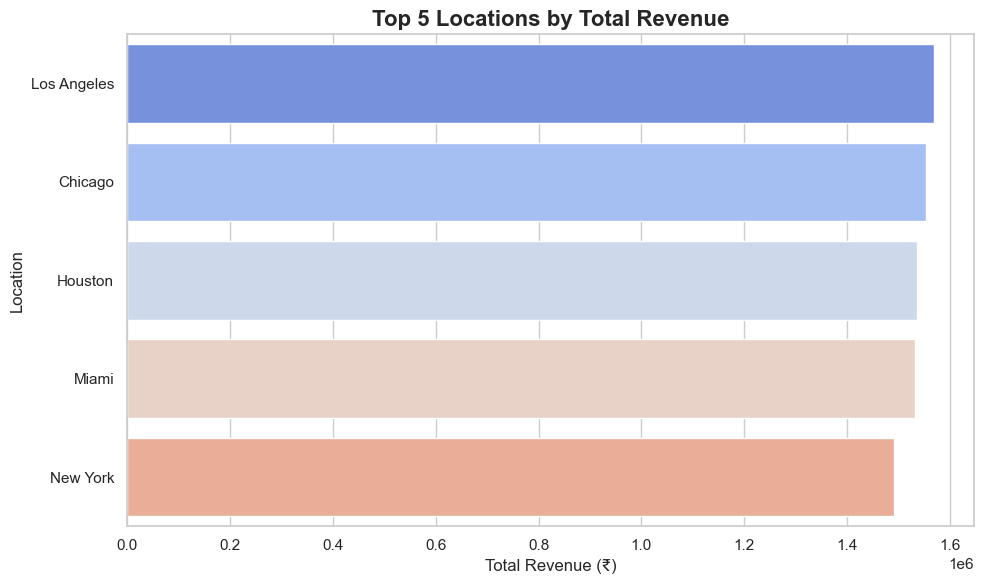

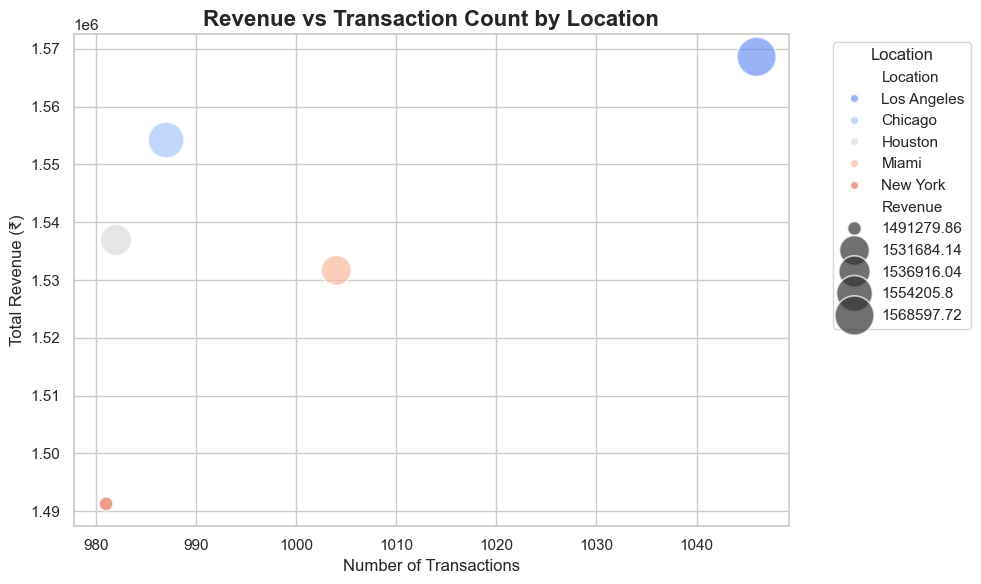

In [3]:
# 1.Which locations have the highest sales and transaction counts?

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         
    user='root',              
    password='Janani@1997', 
    database='DB'   
)

# ---  Call Stored Procedure ---
query = "CALL GetRevenueByLocation();"
df_location = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Revenue and Transaction Count by Location:")
print(df_location.head())

# ---  Visualization 1: Bar Chart (Top 5 Locations by Revenue) ---
sns.set(style="whitegrid", palette="coolwarm")

plt.figure(figsize=(10,6))
top10 = df_location.sort_values("Revenue", ascending=False).head(10)
sns.barplot(data=top10, 
            x='Revenue', 
            y='Location', 
            hue='Location', 
            dodge=False)

plt.title("Top 5 Locations by Total Revenue", fontsize=16, weight='bold')
plt.xlabel("Total Revenue (₹)", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

# ---  Visualization 2: Bubble Chart (Revenue vs Transaction Count) ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_location, 
                x='Transaction_Count', 
                y='Revenue', 
                hue='Location', 
                size='Revenue',
                sizes=(100, 800),
                alpha=0.7,
                palette="coolwarm")

plt.title("Revenue vs Transaction Count by Location", fontsize=16, weight='bold')
plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Total Revenue (₹)", fontsize=12)
plt.grid(True)
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ---  Close Connection ---
conn.close()


C:\Users\janan\AppData\Local\Temp\ipykernel_23324\1301387938.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_delivery = pd.read_sql(query, conn)


Average Delivery Charges by Location:
      Location  AvgDelivery
0      Chicago    27.846130
1     New York    27.691325
2        Miami    27.341952
3  Los Angeles    27.333633
4      Houston    27.127709


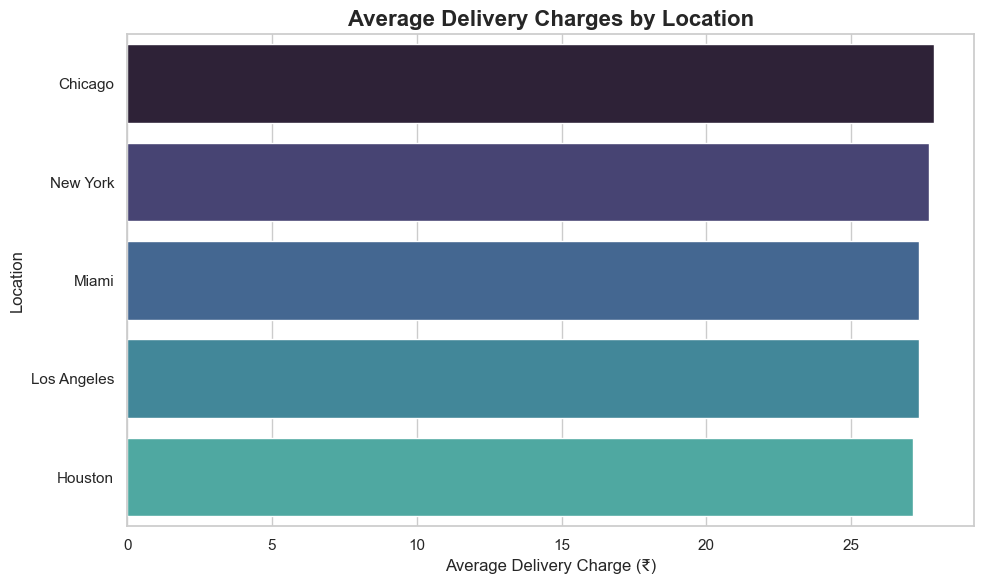

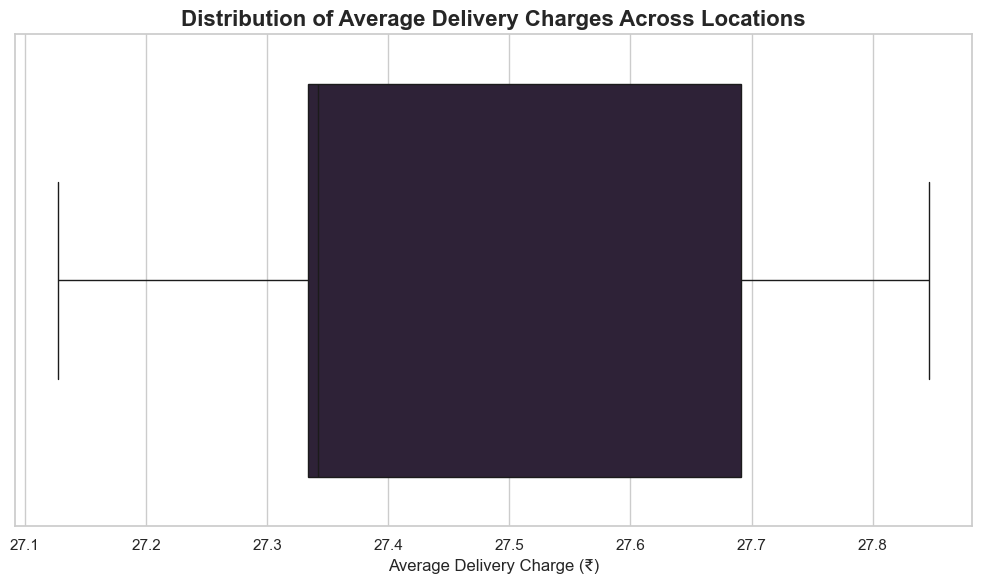

In [6]:
# 2.How do delivery charges vary by location?

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         
    user='root',              
    password='Janani@1997', 
    database='DB'   
)

# ---  Call Stored Procedure ---
query = "CALL GetAvgDeliveryByLocation();"
df_delivery = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Average Delivery Charges by Location:")
print(df_delivery.head())

# ---  Visualization 1: Horizontal Bar Chart ---
sns.set(style="whitegrid", palette="mako")

plt.figure(figsize=(10,6))
top10 = df_delivery.sort_values("AvgDelivery", ascending=False).head(10)
sns.barplot(data=top10,
            x='AvgDelivery',
            y='Location',
            hue='Location',
            dodge=False)

plt.title("Average Delivery Charges by Location", fontsize=16, weight='bold')
plt.xlabel("Average Delivery Charge (₹)", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

# ---  Visualization 2: Boxplot (Distribution Insight) ---
plt.figure(figsize=(10,6))
sns.boxplot(data=df_delivery, x='AvgDelivery')
plt.title("Distribution of Average Delivery Charges Across Locations", fontsize=16, weight='bold')
plt.xlabel("Average Delivery Charge (₹)", fontsize=12)
plt.tight_layout()
plt.show()

# ---  Close Connection ---
conn.close()


C:\Users\janan\AppData\Local\Temp\ipykernel_23324\3180594177.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_coupon_location = pd.read_sql(query, conn)


Coupon Usage by Location:
      Location  Coupon_Used
0  Los Angeles        524.0
1      Houston        506.0
2      Chicago        500.0
3        Miami        478.0
4     New York        472.0


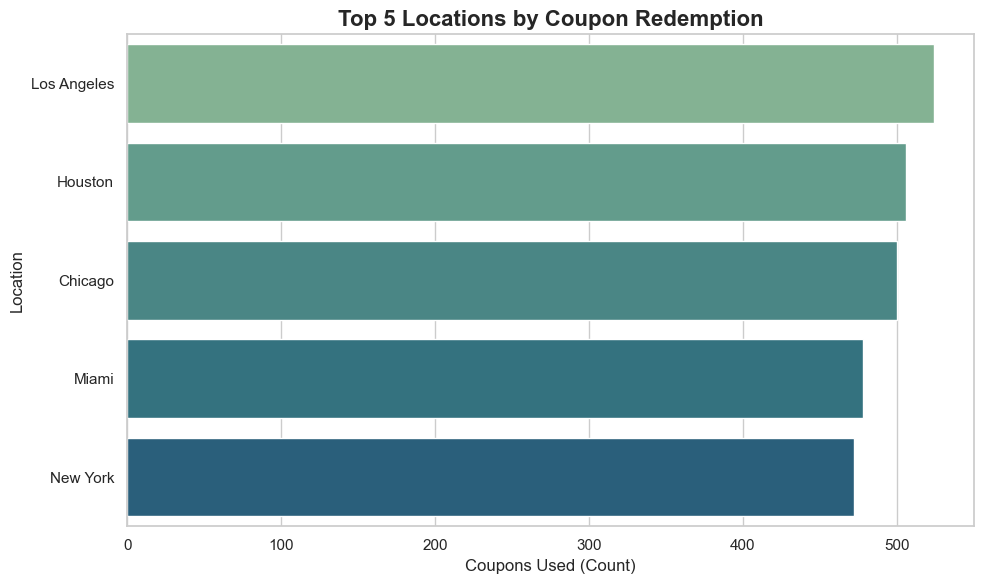

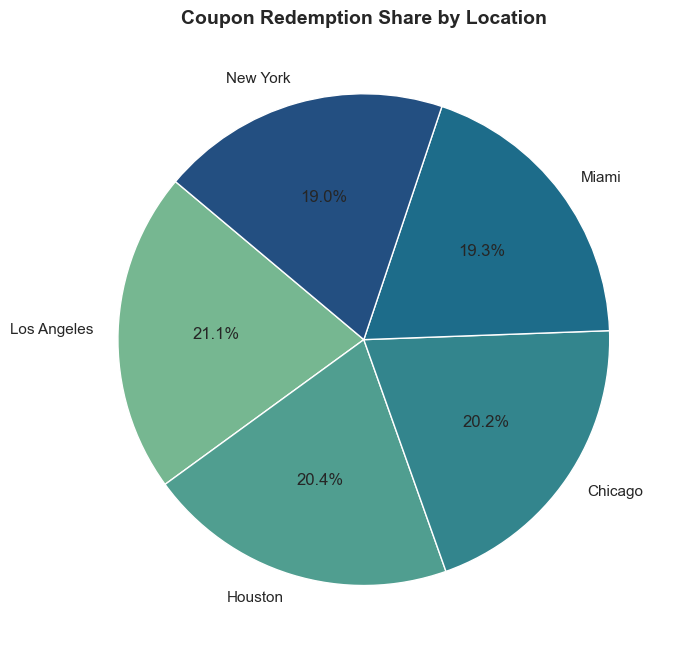

In [7]:
# 3.Do certain locations redeem more coupons than others?

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         
    user='root',              
    password='Janani@1997', 
    database='DB'   
)

# ---  Call Stored Procedure ---
query = "CALL GetCouponUsedByLocation();"
df_coupon_location = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Coupon Usage by Location:")
print(df_coupon_location.head())

# ---  Visualization 1: Horizontal Bar Chart (Top 10 Locations) ---
sns.set(style="whitegrid", palette="crest")

plt.figure(figsize=(10,6))
top10 = df_coupon_location.sort_values("Coupon_Used", ascending=False).head(10)
sns.barplot(data=top10, 
            x='Coupon_Used', 
            y='Location', 
            hue='Location', 
            dodge=False)

plt.title("Top 5 Locations by Coupon Redemption", fontsize=16, weight='bold')
plt.xlabel("Coupons Used (Count)", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

# ---  Visualization 2: Pie Chart (Overall Coupon Usage Share) ---
plt.figure(figsize=(7,7))
plt.pie(df_coupon_location['Coupon_Used'], 
        labels=df_coupon_location['Location'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("crest", len(df_coupon_location)))

plt.title("Coupon Redemption Share by Location", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# ---  Close Connection ---
conn.close()
